<a href="https://colab.research.google.com/github/HugocamposL3/Linguagem-R/blob/main/KNN_Linguagem_R_Credit_Card_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Passo 1: Importar o conjunto de dados

In [1]:
#Import the dataset
loan <- read.csv("/content/german_credit.csv")

Depois de importar o conjunto de dados, vamos dar uma olhada na estrutura do conjunto de dados:

In [2]:
str(loan)

'data.frame':	1000 obs. of  21 variables:
 $ Creditability                    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Account.Balance                  : int  1 1 2 1 1 1 1 1 4 2 ...
 $ Duration.of.Credit..month.       : int  18 9 12 12 12 10 8 6 18 24 ...
 $ Payment.Status.of.Previous.Credit: int  4 4 2 4 4 4 4 4 4 2 ...
 $ Purpose                          : int  2 0 9 0 0 0 0 0 3 3 ...
 $ Credit.Amount                    : int  1049 2799 841 2122 2171 2241 3398 1361 1098 3758 ...
 $ Value.Savings.Stocks             : int  1 1 2 1 1 1 1 1 1 3 ...
 $ Length.of.current.employment     : int  2 3 4 3 3 2 4 2 1 1 ...
 $ Instalment.per.cent              : int  4 2 2 3 4 1 1 2 4 1 ...
 $ Sex...Marital.Status             : int  2 3 2 3 3 3 3 3 2 2 ...
 $ Guarantors                       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Duration.in.Current.address      : int  4 2 4 2 4 3 4 4 4 4 ...
 $ Most.valuable.available.asset    : int  2 1 1 1 2 1 1 1 3 4 ...
 $ Age..years.                      : int  21 36 23

Note que, a variável 'Creditability' é nossa variável de saída ou a variável alvo. O valor da variável de credibilidade representa se o empréstimo de um requerente é aprovado ou rejeitado.

Passo 2: Limpeza de dados
- Algumas dessas variáveis não são essenciais na previsão do empréstimo de um candidato, por exemplo, variáveis como Telefone, Simultânea. Créditos, Duration.in.Current.address, Type.of.apartment, etc. Tais variáveis devem ser removidas porque só aumentarão a complexidade do modelo de Machine Learning.

In [4]:
loan.subset <- loan[c('Creditability','Age..years.','Sex...Marital.Status','Occupation','Account.Balance','Credit.Amount','Length.of.current.employment','Purpose')]
str(loan.subset)

'data.frame':	1000 obs. of  8 variables:
 $ Creditability               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Age..years.                 : int  21 36 23 39 38 48 39 40 65 23 ...
 $ Sex...Marital.Status        : int  2 3 2 3 3 3 3 3 2 2 ...
 $ Occupation                  : int  3 3 2 2 2 2 2 2 1 1 ...
 $ Account.Balance             : int  1 1 2 1 1 1 1 1 4 2 ...
 $ Credit.Amount               : int  1049 2799 841 2122 2171 2241 3398 1361 1098 3758 ...
 $ Length.of.current.employment: int  2 3 4 3 3 2 4 2 1 1 ...
 $ Purpose                     : int  2 0 9 0 0 0 0 0 3 3 ...


Agora reduzimos 21 variáveis para 8 variáveis preditoras que são significativas para a construção do modelo.

Passo 3: Normalização de dados 
- Você deve sempre normalizar o conjunto de dados para que a saída permaneça imparcial. Para explicar isso, vamos dar uma olhada nas primeiras observações em nosso conjunto de dados.

In [5]:
head(loan.subset)

,Creditability,Age..years.,Sex...Marital.Status,Occupation,Account.Balance,Credit.Amount,Length.of.current.employment,Purpose
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,21,2,3,1,1049,2,2
2,1,36,3,3,1,2799,3,0
3,1,23,2,2,2,841,4,9
4,1,39,3,2,1,2122,3,0
5,1,38,3,2,1,2171,3,0
6,1,48,3,2,1,2241,2,0


Observe a variável valor de crédito, sua escala de valor está em 1000s, enquanto as demais variáveis estão em dígitos únicos ou 2 dígitos. Se os dados não forem normalizados, levará a um resultado baised.

In [6]:
#Normalization
normalize <- function(x) {
return ((x - min(x)) / (max(x) - min(x))) }

No trecho de código abaixo, estamos armazenando os dados normalizados definidos na variável 'loan.subset.n' e também estamos removendo a variável 'Credibilidade', pois é a variável de resposta que precisa ser prevista.

In [7]:
loan.subset.n <- as.data.frame(lapply(loan.subset[,2:8], normalize))

Este é o conjunto de dados normalizado:

In [8]:
head(loan.subset.n)

,Age..years.,Sex...Marital.Status,Occupation,Account.Balance,Credit.Amount,Length.of.current.employment,Purpose
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.03571429,0.3333333,0.6666667,0.0000000,0.04396390,0.25,0.2
2,0.30357143,0.6666667,0.6666667,0.0000000,0.14025531,0.50,0.0
3,0.07142857,0.3333333,0.3333333,0.3333333,0.03251898,0.75,0.9
4,0.35714286,0.6666667,0.3333333,0.0000000,0.10300429,0.50,0.0
5,0.33928571,0.6666667,0.3333333,0.0000000,0.10570045,0.50,0.0
6,0.51785714,0.6666667,0.3333333,0.0000000,0.10955211,0.25,0.0


Passo 4: Splicing de dados
- Depois de limpar o conjunto de dados e formatá-lo, o próximo passo é a emenda de dados. A emenda de dados envolve basicamente a divisão do conjunto de dados em conjunto de dados de treinamento e teste. Isso é feito no seguinte trecho de código:

In [9]:
set.seed(123)
dat.d <- sample(1:nrow(loan.subset.n),size=nrow(loan.subset.n)*0.7,replace = FALSE) #random selection of 70% data.
 
train.loan <- loan.subset[dat.d,] # 70% training data
test.loan <- loan.subset[-dat.d,] # remaining 30% test data


Depois de derivar o conjunto de dados de treinamento e teste, o trecho de código abaixo criará um quadro de dados separado para a variável 'Creditability' para que nosso resultado final possa ser comparado com o valor real.

In [10]:
#Creating seperate dataframe for 'Creditability' feature which is our target.
train.loan_labels <- loan.subset[dat.d,1]
test.loan_labels <-loan.subset[-dat.d,1]


Passo 5: Construindo um modelo de machine learning
- Nesta fase, temos que construir um modelo usando o conjunto de dados de treinamento. Como estamos usando o algoritmo KNN para construir o modelo, devemos primeiro instalar o pacote 'classe' fornecido por R. Este pacote tem a função KNN nele:

In [11]:
#Install class package
install.packages('class')
# Load class package
library(class)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Em seguida, vamos calcular o número de observações no conjunto de dados de treinamento. A razão pela qual estamos fazendo isso é que queremos inicializar o valor de 'K' no modelo KNN. Uma das maneiras de encontrar o valor K ideal é calcular a raiz quadrada do número total de observações no conjunto de dados. Esta raiz quadrada lhe dará o valor 'K'.

In [14]:
#Find the number of observation
NROW(train.loan_labels) 

[1] 700

Então, temos 700 observações em nosso conjunto de dados de treinamento. A raiz quadrada de 700 é em torno de 26.45, por isso vamos criar dois modelos. Um com valor 'K' como 26 e o outro modelo com um valor 'K' como 27.

In [15]:
knn.26 <- knn(train=train.loan, test=test.loan, cl=train.loan_labels, k=26)
knn.27 <- knn(train=train.loan, test=test.loan, cl=train.loan_labels, k=27)

Passo 6: Avaliação do Modelo
- Após a construção do modelo, é hora de calcular a precisão dos modelos criados:



In [24]:
#Calculate the proportion of correct classification for k = 26, 27 - Accuracy 
ACC.26 <- 100 * sum(test.loan_labels == knn.26)/NROW(test.loan_labels)
ACC.27 <- 100 * sum(test.loan_labels == knn.27)/NROW(test.loan_labels)
ACC.26
ACC.27

[1] 71.66667

[1] 71.33333

Como mostrado acima, a precisão para K = 26 é de 71,66 e para K = 27 é de 71,33. Também podemos verificar o resultado previsto em relação ao valor real na forma tabular:

In [19]:
# Check prediction against actual value in tabular form for k=26
table(knn.26 ,test.loan_labels)

      test.loan_labels
knn.26   0   1
     0   8   2
     1  83 207

In [20]:
# Check prediction against actual value in tabular form for k=27
table(knn.27 ,test.loan_labels)

      test.loan_labels
knn.27   0   1
     0   7   2
     1  84 207

Você também pode usar a matriz de confusão para calcular a precisão. Para fazer isso, devemos primeiro instalar o infame pacote Caret:

In [21]:
install.packages('caret')
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [23]:
confusionMatrix(table(knn.26 ,test.loan_labels))


Confusion Matrix and Statistics

      test.loan_labels
knn.26   0   1
     0   8   2
     1  83 207
                                        
               Accuracy : 0.7167        
                 95% CI : (0.662, 0.767)
    No Information Rate : 0.6967        
    P-Value [Acc > NIR] : 0.2462        
                                        
                  Kappa : 0.1046        
                                        
 Mcnemar's Test P-Value : <2e-16        
                                        
            Sensitivity : 0.08791       
            Specificity : 0.99043       
         Pos Pred Value : 0.80000       
         Neg Pred Value : 0.71379       
             Prevalence : 0.30333       
         Detection Rate : 0.02667       
   Detection Prevalence : 0.03333       
      Balanced Accuracy : 0.53917       
                                        
       'Positive' Class : 0             
                                        

Assim, a partir da saída, podemos ver que nosso modelo prevê o resultado com uma precisão de 71,67% o que é bom já que trabalhamos com um pequeno conjunto de dados. Um ponto a ser lembrado é que quanto mais dados (dados ideais) você alimentar a máquina, mais eficiente será o modelo.

Passo 7: Otimização

- Para melhorar a precisão do modelo, você pode usar n número de técnicas como o método Elbow e gráfico de precisão percentual máxima. No trecho de código abaixo, criei um loop que calcula a precisão do modelo KNN para valores 'K' variando de 1 a 28. Desta forma, você pode verificar qual valor 'K' resultará no modelo mais preciso:

In [35]:
i=1
k.optm=1
for (i in 1:28){
   knn.mod <- knn(train=train.loan, test=test.loan, cl=train.loan_labels, k=i)
   k.optm[i] <- 100 * sum(test.loan_labels == knn.mod)/NROW(test.loan_labels)
   k=i 
   cat(k,'=',k.optm[i],'\n') 
}

1 = 58.33333 
2 = 55.66667 
3 = 61 
4 = 60 
5 = 64.66667 
6 = 66.66667 
7 = 66.66667 
8 = 66.33333 
9 = 66 
10 = 68.33333 
11 = 67.33333 
12 = 66.66667 
13 = 68 
14 = 67.66667 
15 = 68.33333 
16 = 70 
17 = 70 
18 = 70.33333 
19 = 70.33333 
20 = 70.66667 
21 = 70.66667 
22 = 71.33333 
23 = 71.33333 
24 = 71.66667 
25 = 71.33333 
26 = 71.66667 
27 = 71.33333 
28 = 71 


A partir da saída você pode ver que para K = 25, alcançamos a máxima precisão, ou seja, 68%. Também podemos representar isso graficamente, assim:

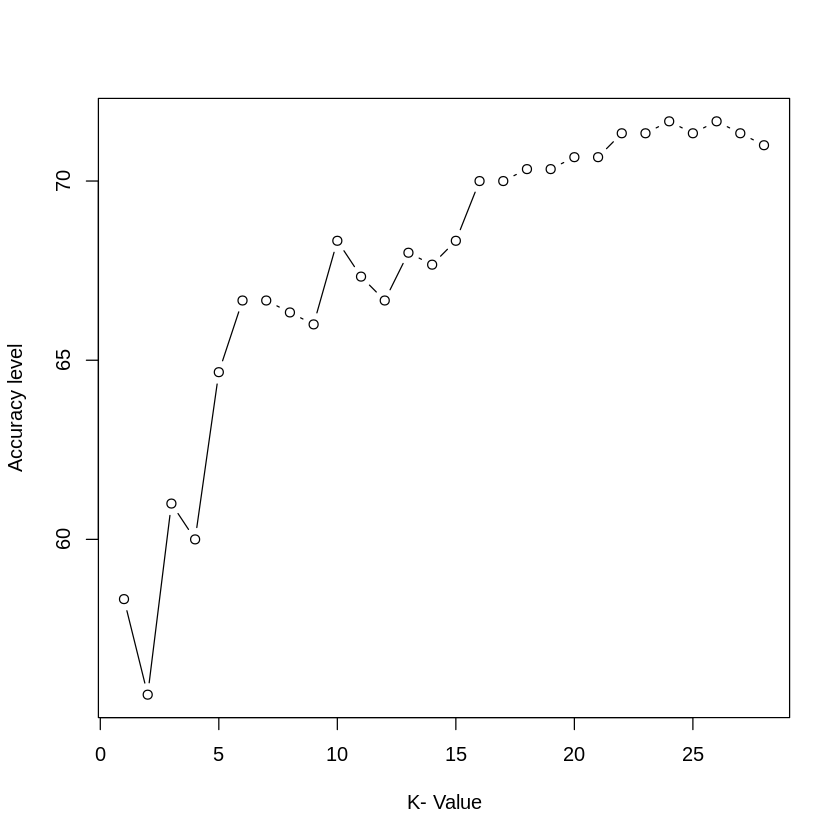

In [36]:
#Accuracy plot
plot(k.optm, type="b", xlab="K- Value",ylab="Accuracy level")